<a href="https://colab.research.google.com/github/juandr77/PROGCOM-B/blob/main/mejora_de_pid_de_velocidad_de_el_motor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

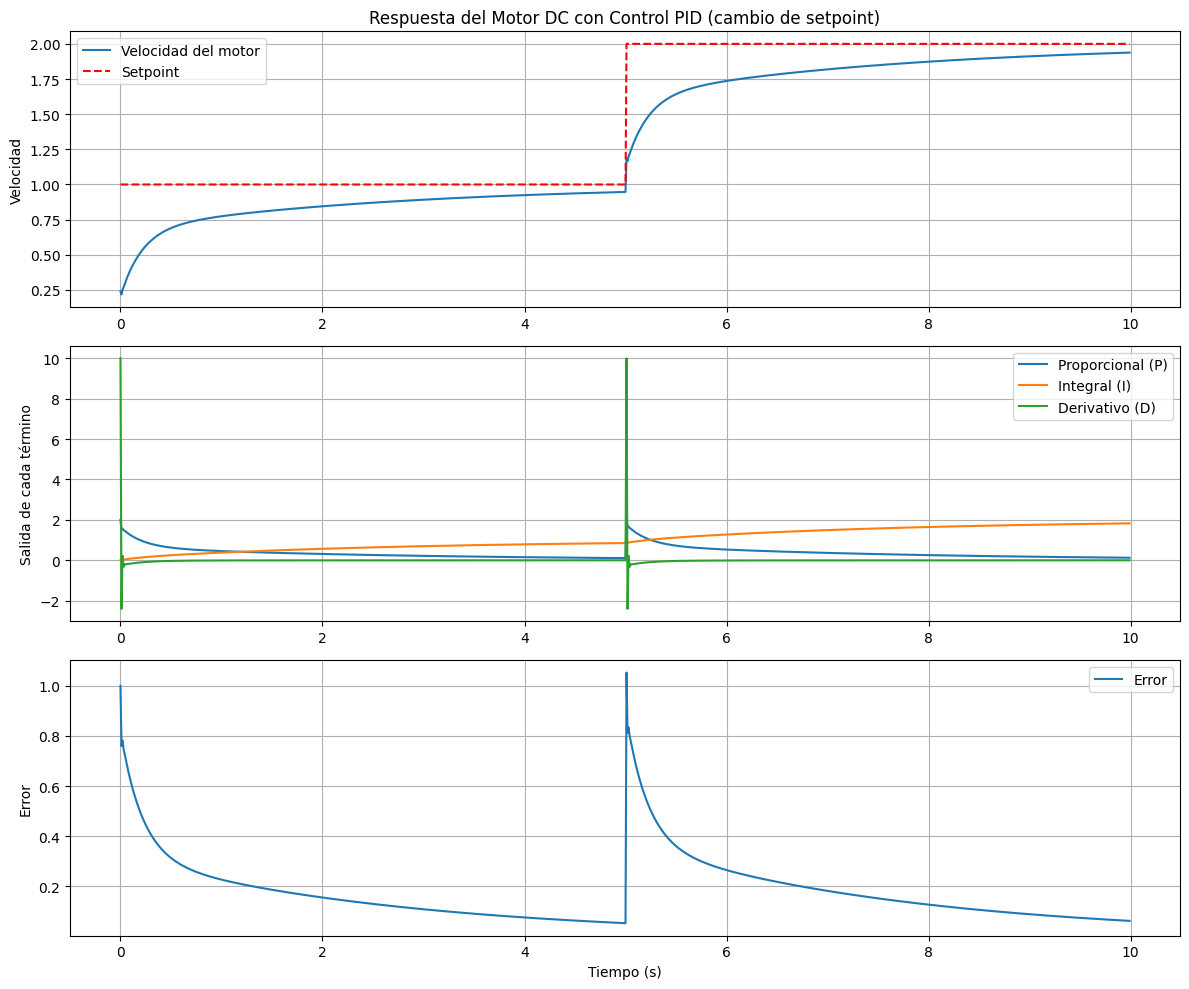

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Parámetros del sistema (motor DC)
K = 1.0      # Ganancia del sistema
T = 0.5      # Constante de tiempo
dt = 0.01    # Paso de simulación
time = np.arange(0, 10, dt)  # Simular 10 segundos

# Controlador PID
Kp = 2.0
Ki = 1.0
Kd = 0.1

# Condiciones iniciales
setpoint = 1.0
velocity = 0.0
error_sum = 0.0
last_error = 0.0

# Listas para graficar
velocities = []
errors = []
setpoints = []
u_values = []
P_terms = []
I_terms = []
D_terms = []

for t in time:
    # Cambio de setpoint a los 5 segundos
    if t > 5:
        setpoint = 2.0

    error = setpoint - velocity
    error_sum += error * dt
    d_error = (error - last_error) / dt

    # Cálculo de los términos PID
    P = Kp * error
    I = Ki * error_sum
    D = Kd * d_error
    u = P + I + D

    # Simulación del motor (modelo de primer orden)
    velocity += dt * (-(1/T) * velocity + (K/T) * u)

    # Guardar valores
    velocities.append(velocity)
    errors.append(error)
    setpoints.append(setpoint)
    u_values.append(u)
    P_terms.append(P)
    I_terms.append(I)
    D_terms.append(D)
    last_error = error

# =============================
# Gráficas
# =============================

plt.figure(figsize=(12, 10))

# Gráfica 1: Velocidad
plt.subplot(3, 1, 1)
plt.plot(time, velocities, label="Velocidad del motor")
plt.plot(time, setpoints, 'r--', label="Setpoint")
plt.title("Respuesta del Motor DC con Control PID (cambio de setpoint)")
plt.ylabel("Velocidad")
plt.legend()
plt.grid(True)

# Gráfica 2: Señales del PID
plt.subplot(3, 1, 2)
plt.plot(time, P_terms, label="Proporcional (P)")
plt.plot(time, I_terms, label="Integral (I)")
plt.plot(time, D_terms, label="Derivativo (D)")
plt.ylabel("Salida de cada término")
plt.legend()
plt.grid(True)

# Gráfica 3: Error
plt.subplot(3, 1, 3)
plt.plot(time, errors, label="Error")
plt.xlabel("Tiempo (s)")
plt.ylabel("Error")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
